# Visualize Learning Rate Schedulers

- Visualize several methods to adjust the learning rate in PyTorch

----

Learning rate scheduling should be applied after optimizer’s update; e.g., you should write your code this way:
```shell
>>> scheduler = ...
>>> for epoch in range(100):
>>>     train(...)
>>>     validate(...)
>>>     scheduler.step()
```

- Note:
> Prior to PyTorch 1.1.0, the learning rate scheduler was expected to be called before the optimizer’s update;

In [141]:
# Dependence
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# Initialize
LEARNING_RATE = 0.01
model = nn.Linear(10, 20)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

Text(0, 0.5, 'Learning Rate')

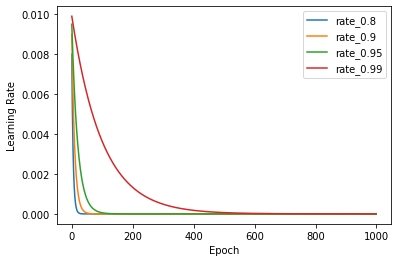

In [143]:
'''
torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch=-1)
'''

for rate in [0.8, 0.9, 0.95, 0.99]:
    lamb = lambda epoch: rate ** epoch
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lamb)
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

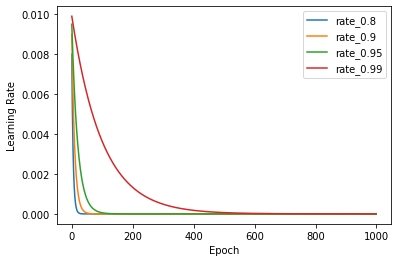

In [144]:
'''
torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda, last_epoch=-1)
'''

for rate in [0.8, 0.9, 0.95, 0.99]:
    lamb = lambda epoch: rate
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lamb)
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

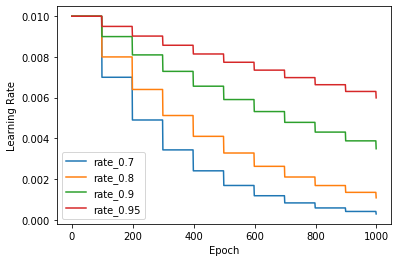

In [145]:
'''
torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)
'''

for rate in [0.7, 0.8, 0.9, 0.95]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=rate)
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

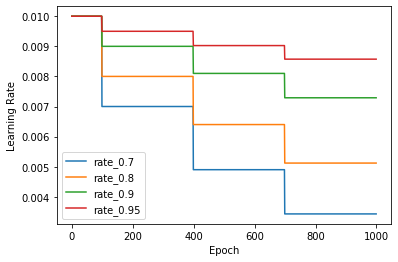

In [146]:
'''
torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1, last_epoch=-1)
'''

for rate in [0.7, 0.8, 0.9, 0.95]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.MultiStepLR(
        optimizer, milestones=[100, 400, 700], gamma=rate)
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

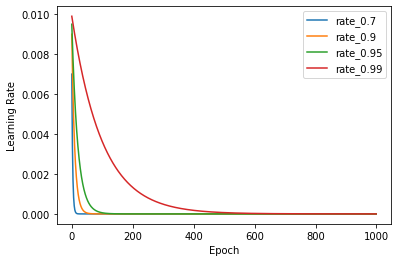

In [147]:
'''
torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma, last_epoch=-1)
'''

for rate in [0.7, 0.9, 0.95, 0.99]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=rate)
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Text(0, 0.5, 'Learning Rate')

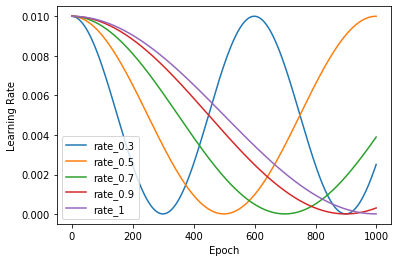

In [148]:
'''
torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0, last_epoch=-1)

Parameters
    optimizer (Optimizer) – Wrapped optimizer.
    T_max (int) – Maximum number of iterations.
    eta_min (float) – Minimum learning rate. Default: 0.
    last_epoch (int) – The index of last epoch. Default: -1.
'''

for rate in [0.3, 0.5, 0.7, 0.9, 1]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    max_epoch = 1000
    scheduler = lr_scheduler.CosineAnnealingLR(
        optimizer, T_max=rate * max_epoch, eta_min=1e-5)
    lr_recoder = []
    for epoch in range(max_epoch):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

In [149]:
'''
torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

Parameters
optimizer (Optimizer) – Wrapped optimizer.

mode (str) – One of min, max. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing. Default: ‘min’.

factor (float) – Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.

patience (int) – Number of epochs with no improvement after which learning rate will be reduced. For example, if patience = 2, then we will ignore the first 2 epochs with no improvement, and will only decrease the LR after the 3rd epoch if the loss still hasn’t improved then. Default: 10.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

threshold (float) – Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.

threshold_mode (str) – One of rel, abs. In rel mode, dynamic_threshold = best * ( 1 + threshold ) in ‘max’ mode or best * ( 1 - threshold ) in min mode. In abs mode, dynamic_threshold = best + threshold in max mode or best - threshold in min mode. Default: ‘rel’.

cooldown (int) – Number of epochs to wait before resuming normal operation after lr has been reduced. Default: 0.

min_lr (float or list) – A scalar or a list of scalars. A lower bound on the learning rate of all param groups or each group respectively. Default: 0.

eps (float) – Minimal decay applied to lr. If the difference between new and old lr is smaller than eps, the update is ignored. Default: 1e-8.
'''

'''
Example
>>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
>>> scheduler = ReduceLROnPlateau(optimizer, 'min')
>>> for epoch in range(10):
>>>     train(...)
>>>     val_loss = validate(...)
>>>     # Note that step should be called after validate()
>>>     scheduler.step(val_loss)
'''

"\nExample\n>>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)\n>>> scheduler = ReduceLROnPlateau(optimizer, 'min')\n>>> for epoch in range(10):\n>>>     train(...)\n>>>     val_loss = validate(...)\n>>>     # Note that step should be called after validate()\n>>>     scheduler.step(val_loss)\n"

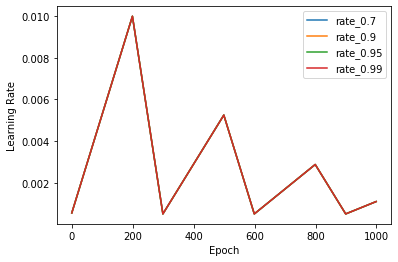

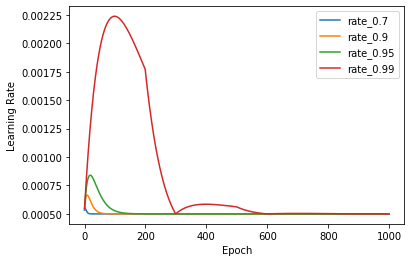

In [150]:
'''
torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr, max_lr, step_size_up=2000, step_size_down=None, mode='triangular', gamma=1.0, scale_fn=None, scale_mode='cycle', cycle_momentum=True, base_momentum=0.8, max_momentum=0.9, last_epoch=-1)

Demo: https://github.com/bckenstler/CLR

'''

for rate in [0.7, 0.9, 0.95, 0.99]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.CyclicLR(
        optimizer,
        base_lr=LEARNING_RATE * 0.05,
        max_lr=LEARNING_RATE,
        step_size_down=100,
        step_size_up=200,
        mode='triangular2',  # triangular, exp_range
    )
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 
for rate in [0.7, 0.9, 0.95, 0.99]:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.CyclicLR(
        optimizer,
        base_lr=LEARNING_RATE * 0.05,
        max_lr=LEARNING_RATE,
        step_size_down=100,
        step_size_up=200,
        mode='exp_range',
        gamma=rate,
    )
    lr_recoder = []
    for epoch in range(1000):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

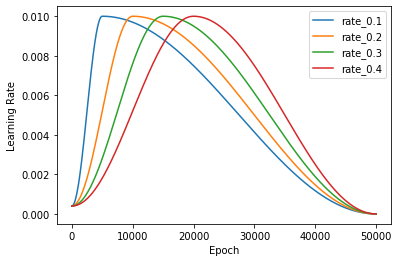

In [151]:
'''
torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, total_steps=None, epochs=None, steps_per_epoch=None, pct_start=0.3, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, last_epoch=-1)

Note:
The 1cycle learning rate policy changes the learning rate after every batch. step should be called after a batch has been used for training.

'''

for rate in [0.1, 0.2, 0.3, 0.4]:
    max_epoch=1000
    steps_per_epoch=50

    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=LEARNING_RATE,
        anneal_strategy='cos',
        pct_start=rate,
        steps_per_epoch=steps_per_epoch, # it should be len(data_loader)
        epochs=max_epoch,
    )
    lr_recoder = []
    step_size_total = max_epoch * steps_per_epoch
    for epoch in range(step_size_total):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

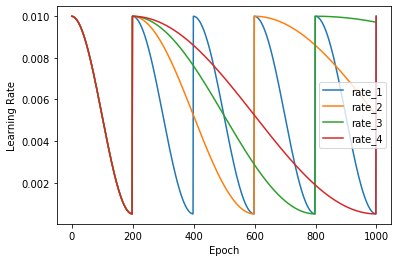

In [156]:
'''
torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0, T_mult=1, eta_min=0, last_epoch=-1)

Set the learning rate of each parameter group using a cosine annealing schedule

Parameters
optimizer (Optimizer) – Wrapped optimizer.
T_0 (int) – Number of iterations for the first restart.
T_mult (int, optional) – A factor increases T_{i} after a restart. Default: 1.
eta_min (float, optional) – Minimum learning rate. Default: 0.
last_epoch (int, optional) – The index of last epoch. Default: -1.
'''

for rate in [1, 2, 3, 4]:
    max_epoch=1000
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    scheduler = lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer,
        T_0=200,
        T_mult=rate,
        eta_min=LEARNING_RATE*0.05,
    )
    lr_recoder = []
    for epoch in range(max_epoch):
        scheduler.step()
        get_lr = optimizer.param_groups[0]['lr']
        lr_recoder.append(get_lr)
    plt.plot(lr_recoder, label=f'rate_{rate}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()